In [2]:
import pandas as pd
import numpy as np
import math
import requests
from io import StringIO

url="https://radwatch.berkeley.edu/test/tmp/Station.csv"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

s=requests.get(url, headers=header).text
c=pd.read_csv(StringIO(s))

In [3]:
newpacket = []
areanames = []
for areas in range(1,30):
    try:
        nickname = c['nickname'][areas]
        url="https://radwatch.berkeley.edu/test/tmp/dosenet/" + nickname + "_month.csv"
        sec=requests.get(url, headers=header).text
        cont=pd.read_csv(StringIO(sec))
    except:
        print('error occured, df for ' + nickname + 'skipped')
        continue
    else:
        newpacket.append(cont)
        areanames.append(nickname)
        print('done.')

done.
done.
done.
done.
done.
done.
done.
done.
done.
done.
done.
done.
error occured, df for dshsskipped
done.
done.
done.
done.
done.
done.
error occured, df for hillside_highskipped
done.
error occured, df for hf6skipped
done.
done.
done.
error occured, df for cherkasyskipped
done.
done.
error occured, df for fukushimahsskipped


In [7]:
newaverages = []
errorFreePackets = []
newCPMS = []
newMEANS = []
listofSUMS = []
cpmlists  = []
for areas in range(len(newpacket)):
    try:
        df = newpacket[areas]
        cpmdf = df['cpm']
        sumdf = cpmdf.sum()
        sumdf = sumdf/len(df)
        print(sumdf)
    except:
        areanames.pop(areas)
        print('area removed, no counts found.')
        continue
    else:
        print('completed.')
        newaverages.append(sumdf)
        errorFreePackets.append(areanames[areas])
        CPMstd = np.std(cpmdf)
        newCPMS.append(CPMstd)
        CPMmean = np.mean(cpmdf)
        newMEANS.append(CPMmean)
        listofSUMS.append(cpmdf.sum())
        cpmlists.append(cpmdf.to_numpy())
        

2.656171059049215
completed.
1.5608624929407156
completed.
1.6130836708817753
completed.
2.412770007381698
completed.
3.1702728061993684
completed.
2.7463549415734048
completed.
1.7264080066480434
completed.
0.0
completed.
1.683175235729165
completed.
4.403279939893253
completed.
2.1268078539532445
completed.
0.927064650727312
completed.
1.5258071186870126
completed.
5.756368001951162
completed.
7.389229168841051
completed.
1.6225358678521262
completed.
1.603502347740443
completed.
2.9059485555073796
completed.
4.196858253288831
completed.
1.6315447619650698
completed.
3.526899853637477
completed.
3.783083564600678
completed.
3.4884640482583524
completed.
2.557953403269451
completed.


In [8]:
newaverages = []
errorFreePackets = []
newCPMS = []
newMEANS = []
listofSUMS = []
for areas in range(len(newpacket)):
    try:
        df = newpacket[areas]
        cpmdf = df['cpm']
        sumdf = cpmdf.sum()
        sumdf = sumdf/len(df)
        print(sumdf)
    except:
        areanames.pop(areas)
        print('area removed, no counts found.')
        continue
    else:
        print('completed.')
        newaverages.append(sumdf)
        errorFreePackets.append(areanames[areas])
        total_counts  = sumdf * 5
        nmin  = len(cpmdf.to_numpy())*5
        mean_unc  = math.sqrt(total_counts)/nmin
        newCPMS.append(mean_unc)
        CPMmean = np.mean(cpmdf)
        newMEANS.append(CPMmean)
        listofSUMS.append(cpmdf.sum())
        cpmlists.append(cpmdf.to_numpy())
        

2.656171059049215
completed.
1.5608624929407156
completed.
1.6130836708817753
completed.
2.412770007381698
completed.
3.1702728061993684
completed.
2.7463549415734048
completed.
1.7264080066480434
completed.
0.0
completed.
1.683175235729165
completed.
4.403279939893253
completed.
2.1268078539532445
completed.
0.927064650727312
completed.
1.5258071186870126
completed.
5.756368001951162
completed.
7.389229168841051
completed.
1.6225358678521262
completed.
1.603502347740443
completed.
2.9059485555073796
completed.
4.196858253288831
completed.
1.6315447619650698
completed.
3.526899853637477
completed.
3.783083564600678
completed.
3.4884640482583524
completed.
2.557953403269451
completed.


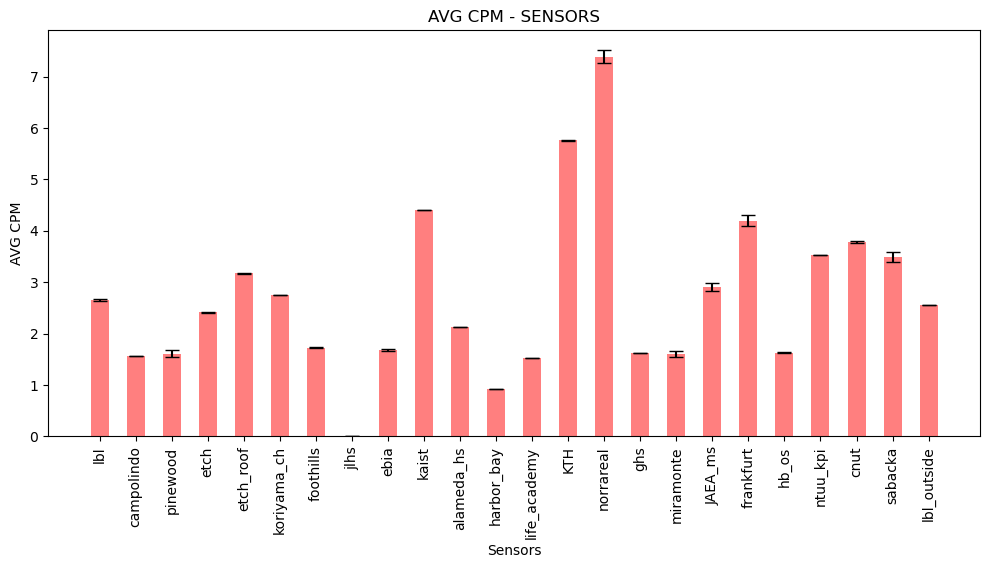

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_pos = np.arange(len(newCPMS))
ax.bar(areanames,
       newMEANS,
       yerr=newCPMS,
       align='center',
       alpha=0.5,
       color = 'red',
       ecolor='black',
       capsize=5,
       width = .5)
fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_title('AVG CPM - SENSORS')
ax.set_xlabel('Sensors')
ax.set_ylabel('AVG CPM')
ax.set_xticks(list(range(0,len(areanames))))
ax.set_xticklabels(areanames)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

#add regions / colors
#formal names
#interactive - plotly!
#script that saves as HTML to embed. 

